## C2C Shelby Fletcher
## L3 - Python Programming

In [13]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

1)	Use basic Python operators to find the number of seconds in the month of June. Find the number of seconds that have lapsed between 14 Aug, 0930 and 1 June, 1200. 

In [14]:
DayandHours = 24*30
JuneSeconds = DayandHours * 60 * 60
JuneSeconds

2592000

In [15]:
bulkTime = 73 * 24 * 60 *60
bulkTime
Aug14 = (2400-930) *60
June1 = 1200 * 60
totalTime = bulkTime + Aug14 + June1
totalTime

6467400

2)	Import a table (‘world_population.csv’) and find:
a.	The population in 2016. 
b.	The population growth between 1950 (beginning of dataset) and 2016. 
c.	The annual growth rates over the course of the dataset


In [16]:
popData = Table.read_table('world_population.csv')
popData

Population
2557628654
2594939877
2636772306
2682053389
2730228104
2782098943
2835299673
2891349717
2948137248
3000716593
... (56 rows omitted)

In [17]:
popData.num_rows

66

In [18]:
pop = popData.row(65)
pop

Row(Population=7256490011)

4) Titanic Data Table Manipulation

In [19]:
from datascience import *
from datascience.predicates import are
path_data = '../../../data/'
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [20]:
titanicURL = 'https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv'
titanic = Table.read_table(titanicURL)

In [25]:
titanic = titanic.relabeled('Pclass', 'passenger_class')

In [26]:
newdata = titanic.column('SibSp')+titanic.column('Parch')
titanic.with_columns('family_size', newdata)

PassengerId | Survived | passenger_class | Name                                                | Sex    | Age  | SibSp | Parch | Ticket           | Fare    | Cabin | Embarked | family_size
1           | 0        | 3               | Braund, Mr. Owen Harris                             | male   | 22   | 1     | 0     | A/5 21171        | 7.25    | nan   | S        | 1
2           | 1        | 1               | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38   | 1     | 0     | PC 17599         | 71.2833 | C85   | C        | 1
3           | 1        | 3               | Heikkinen, Miss. Laina                              | female | 26   | 0     | 0     | STON/O2. 3101282 | 7.925   | nan   | S        | 0
4           | 1        | 1               | Futrelle, Mrs. Jacques Heath (Lily May Peel)        | female | 35   | 1     | 0     | 113803           | 53.1    | C123  | S        | 1
5           | 0        | 3               | Allen, Mr. William Henry                            | male   | 35   | 0     | 0     | 373450           | 8.05    | nan   | S        | 0
6           | 0        | 3               | Moran, Mr. James                                    | male   | nan  | 0     | 0     | 330877           | 8.4583  | nan   | Q        | 0
7           | 0        | 1               | McCarthy, Mr. Timothy J                             | male   | 54   | 0     | 0     | 17463            | 51.8625 | E46   | S        | 0
8           | 0        | 3               | Palsson, Master. Gosta Leonard                      | male   | 2    | 3     | 1     | 349909           | 21.075  | nan   | S        | 4
9           | 1        | 3               | Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   | female | 27   | 0     | 2     | 347742           | 11.1333 | nan   | S        | 2
10          | 1        | 2               | Nasser, Mrs. Nicholas (Adele Achem)                 | female | 14   | 1     | 0     | 237736           | 30.0708 | nan   | C        | 1
... (881 rows omitted)

In [27]:
pclass = titanic.group('passenger_class', collect=None)
pclass

passenger_class | count
1               | 216
2               | 184
3               | 491

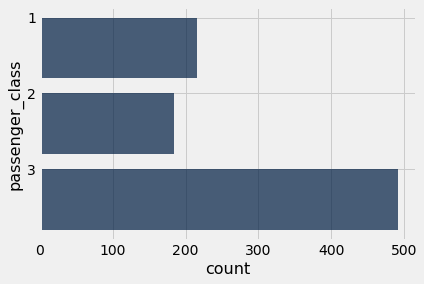

In [28]:
pclass.barh('passenger_class', 'count')

In [30]:
young5 = titanic.sort('Age')
young5.show(5)

In [32]:
old5 = titanic.sort('Age', descending=True)
old5.show(5)

In [34]:
nonan = titanic.where('Age', are.above(0))
nonan.show(5)

In [36]:
survived = titanic.group('passenger_class', np.mean)
survived

passenger_class | PassengerId mean | Survived mean | Name mean | Sex mean | Age mean | SibSp mean | Parch mean | Ticket mean | Fare mean | Cabin mean | Embarked mean
1               | 461.597          | 0.62963       |           |          | nan      | 0.416667   | 0.356481   |             | 84.1547   |            |
2               | 445.957          | 0.472826      |           |          | nan      | 0.402174   | 0.380435   |             | 20.6622   |            |
3               | 439.155          | 0.242363      |           |          | nan      | 0.615071   | 0.393075   |             | 13.6756   |            |